In [45]:
# pip install python-louvain
# pip install networkx

In [2]:
import networkx as nx
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
%matplotlib inline
from TwitterAPI import TwitterAPI
import tweepy
from dotenv import dotenv_values
import re

In [3]:
config = dotenv_values('.env')
config = dict(config)
config

{'APIKEY': 'psJAxRJ5knbHWJYjBPOdLiTYW',
 'APIKEYSECRET': 'uIEbmJtaFMq0lXOYqJoCCZdMfRsuuVF18t0gzq2T1Xv5jF30vP',
 'BEARERTOKEN': 'AAAAAAAAAAAAAAAAAAAAAGM8mQEAAAAAGZEaC%2B1mugLiCXNvbUSxiiE2jTY%3DXr5gxEFwIifEDH9tCT7YbSPP5v2JEVmGxA74rcX1pW3ViaApxV',
 'ACCESSTOKEN': '1514498791587876868-kMXd5X8pPrT4zo7J6IMYn0ldaPGSHD',
 'ACCESSTOKENSECRET': 'VWZTd7DZNzPegpJkXzgX74VRecRSLuRr8Ghxp96xW4FH2'}

In [4]:
api_key = config['APIKEY']
api_secrets = config['APIKEYSECRET']
bearer_token = config['BEARERTOKEN']
access_token = config['ACCESSTOKEN']
access_token_secret = config['ACCESSTOKENSECRET']
auth = tweepy.OAuthHandler(api_key,api_secrets)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)
try:
    api.verify_credentials()
    print('-------------------------\nSuccessful Authentication\n-------------------------')
except:
    print('-------------------------\nFailed authentication\n-------------------------')

-------------------------
Successful Authentication
-------------------------


In [94]:
# plt.rcParams.update(plt.rcParamsDefault)
# plt.rcParams.update({'figure.figsize': (15, 10)})
# get reproducible results

In [5]:
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

In [6]:
edges=[]
tweets = api.search_tweets(q='chelsea from: 433',count=10000)
for tweet in tweets:
    user = tweet.user.screen_name
    mentions = [mention['screen_name'] for mention in tweet.entities['user_mentions']]
    hashtags = [hashtag['text'] for hashtag in tweet.entities['hashtags']]
    for mention in mentions:
        edges.append((user, mention))
    for hashtag in hashtags:
        edges.append((user, hashtag))
with open('twitter_edgelist.txt', 'w', encoding='utf-8') as f:
    for edge in edges:
        f.write(f'{edge[0]} {edge[1]}\n')

In [8]:
data_path = 'twitter_edgelist.txt'

In [9]:
G_social = nx.read_edgelist(data_path)

In [10]:
pos = nx.spring_layout(G_social)

In [28]:
# plt.rcParams.update({'figure.figsize': (20, 20)})

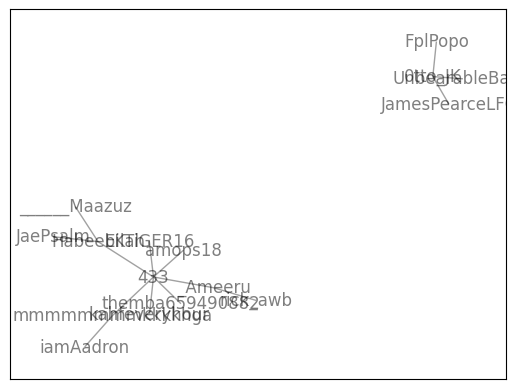

In [11]:
nx.draw_networkx(G_social, pos=pos, node_size=0, edge_color="#444444", alpha=0.5, with_labels=True)

In [10]:
# import networkx as nx
# import matplotlib.pyplot as plt

# # Create a graph
# G = nx.karate_club_graph()

# # Compute the Spring layout
# pos = nx.spring_layout(G)

# # Draw the graph with the Spring layout
# nx.draw(G, pos, with_labels=True)

# # Show the plot
# plt.show()

In [12]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", tweet).split())

In [17]:
query = "#engineering min_retweets:1"
tweets = api.search_tweets(q=query,count=1000)

tweet_data = []
for tweet in tweets:
    user = tweet.user.screen_name
    hashtags = [hashtag["text"] for hashtag in tweet.entities["hashtags"]]
    mentions = [mention["screen_name"] for mention in tweet.entities["user_mentions"]]
    retweet_count = tweet.retweet_count
    favorites_count = tweet.favorite_count
    tweet_data.append({"user" : user, "text": tweet.text, "hashtags": hashtags, "mentions": mentions, "retweets": retweet_count, "favorites": favorites_count})

In [13]:
# tweet_data = [{k: v for k, v in tweet.items() if v != []} for tweet in tweet_data]
# for tweet in tweet_data:
#     tweet = dict(tweet.items())
tweet_data
# print(tweet_data)

[{'text': "China's most sophisticated stealth fighter plane, the J-20 Mighty Dragon, will be operated alongside a new cutting-… https://t.co/VgEjAceAJm",
  'hashtags': [],
  'mentions': [],
  'retweets': 2,
  'favorites': 1},
 {'text': 'Hire us to do  your\n#Thesis\n#math\n#Music\n#Finances\n#Geometry\n#Tests\n#Biology\n#Accounting\n#Essays\n#History… https://t.co/lofwm5SXnq',
  'hashtags': ['Thesis',
   'math',
   'Music',
   'Finances',
   'Geometry',
   'Tests',
   'Biology',
   'Accounting',
   'Essays',
   'History'],
  'mentions': [],
  'retweets': 1,
  'favorites': 1},
 {'text': "This Spring, let's handle your:-\n#Assignments\n#Calculus\n#Homework\n#Fallclasses\n#Onlineclass\n#Finance\n#Accounting… https://t.co/Ndr9ZL9WtB",
  'hashtags': ['Assignments',
   'Calculus',
   'Homework',
   'Fallclasses',
   'Onlineclass',
   'Finance',
   'Accounting'],
  'mentions': [],
  'retweets': 1,
  'favorites': 1},
 {'text': 'Hire us to do  your\n#Thesis\n#math\n#Music\n#Finances\n#Geometry\

C:\Users\krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38442 (\N{CJK UNIFIED IDEOGRAPH-962A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\krish\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 370

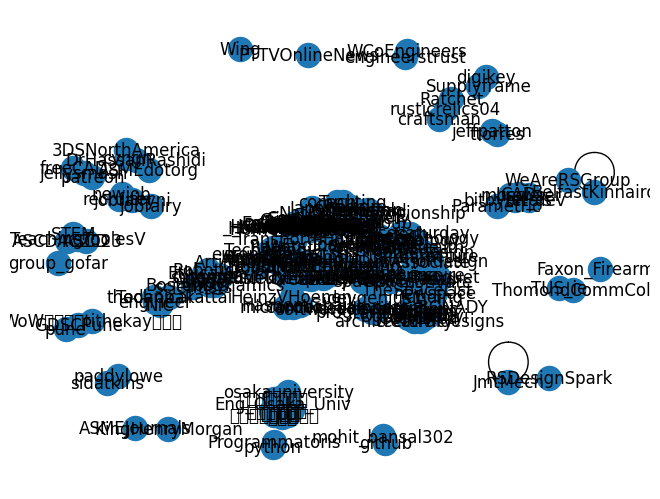

In [18]:
# Create a NetworkX graph object
G = nx.Graph()

# We first add nodes to the graph
# Then we add edges to the graph based on user mentions and hashtags

for tweet in tweet_data:
       if tweet['hashtags'] or tweet['mentions'] or tweet['retweets'] > 0 or tweet['favorites'] > 0:
            user = tweet['user']
            hashtags = tweet['hashtags']
            mentions = tweet['mentions']

            G.add_node(user)
            for hashtag in hashtags:
                G.add_node(hashtag)
            for mention in mentions:
                G.add_node(mention)

            for hashtag in hashtags:
                G.add_edge(user, hashtag)
            for mention in mentions:
                G.add_edge(user, mention)

nx.draw(G, with_labels=True)
plt.show()


        

In [41]:
# import csv

# # Write nodes to file
# with open('nodes.csv', 'w', newline='', encoding='utf-8') as csvfile:
#     writer = csv.writer(csvfile)
#     for tweet in tweet_data:
#         writer.writerow([tweet["text"]])

# # Write edges to file
# with open('edges.csv', 'w', newline='', encoding='utf-8') as csvfile:
#     writer = csv.writer(csvfile)
#     for tweet in tweet_data:
#         for mention in tweet["mentions"]:
#             if G.has_node(mention):
#                 writer.writerow([tweet["text"], mention])
#         for hashtag in tweet["hashtags"]:
#             if G.has_node(hashtag):
#                 writer.writerow([tweet["text"], hashtag])


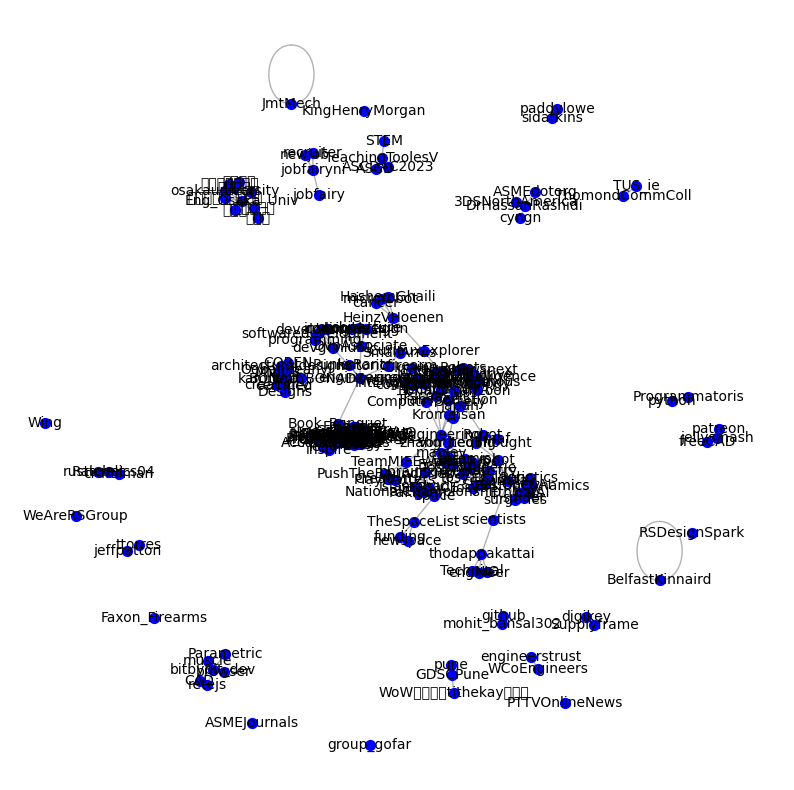

In [19]:
communities = nx.algorithms.community.greedy_modularity_communities(G)

pos = nx.spring_layout(G)
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_size=50, node_color="blue")
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
plt.axis("off")
plt.show()